# Comparison of the generic power model with the pywake library

In this notebook, we compare the results of our generic wind turbine power curve (GWTPC) with that proposed by DTU in the pywake library that allows to additionally calculate the effect of wakes on the power production of a wind farm. This library can be found at:

https://topfarm.pages.windenergy.dtu.dk/PyWake/notebooks/WindTurbines.html#Power-curves-and-CT-curves

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10, 5)
import GenericWindTurbinePowerCurve as GWTPC

## Generation of a generic power curve with pywake
PyWake has a GenericWindTurbine class which make a wind turbine where the power is computed by an analytical model based on diameter and nominal power.

The model takes a lot of optional inputs which default to empirical values, e.g.

    air_density= 1.225 kg/m
    max_cp= .49
    constant_ct= .8
    gear_loss_const= .01
    gear_loss_var= .014
    generator_loss= 0.03
    converter_loss= .03
    

We start by generating a power curve for a wind turbine with  a diameter of 178.3m and hub height of 119m

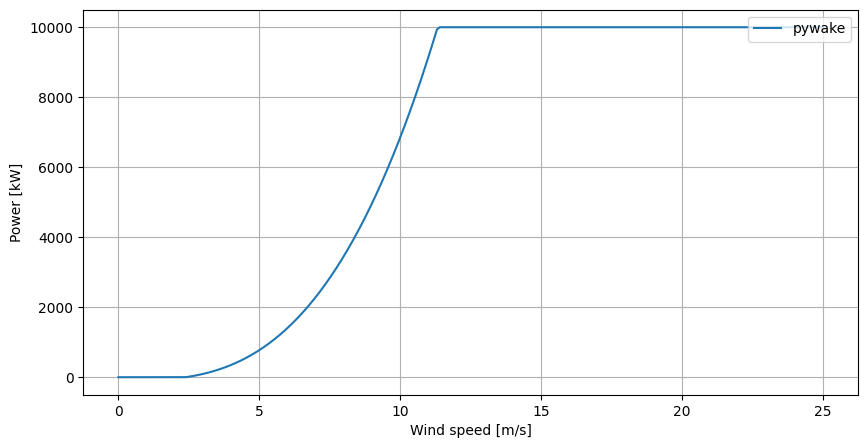

In [2]:
from py_wake.wind_turbines.generic_wind_turbines import GenericWindTurbine
gen_wt = GenericWindTurbine('pywake test turbine', 178.3, 119, power_norm=10000, turbulence_intensity=.0)

ws = np.arange(0,25,0.01)
plt.plot(ws, gen_wt.power(ws)*1e-3,'-', label='pywake')
plt.legend(loc=1)
plt.xlabel('Wind speed [m/s]')
plt.ylabel('Power [kW]')
plt.grid()

## Comparison of pywake with the generic wind turbine power curve model

### Comparison for different Cp models

We first reprensent the setup of the generic model which is the most similar to the generic model of pywake:

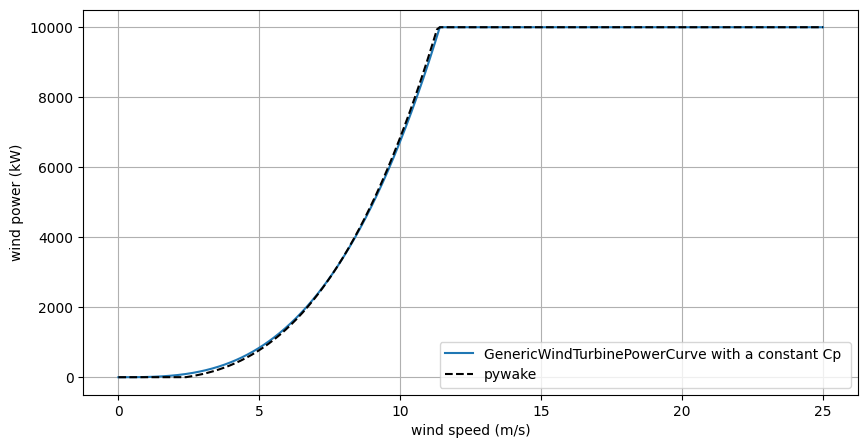

In [3]:
Pwt_GWTPC=GWTPC.GenericWindTurbinePowerCurve(ws,Pnom=10000,Drotor=178.3,Vcutin=0,CpMax=.49,zhub=119,TI=0.00,Model='constant')

plt.plot(ws,Pwt_GWTPC,label='GenericWindTurbinePowerCurve with a constant Cp ')

plt.plot(ws, gen_wt.power(ws)*1e-3,'k--', label='pywake')
plt.ylabel('wind power (kW)')
plt.xlabel('wind speed (m/s)')
plt.legend()
plt.grid()

We compare the differences between the power curves when different CP model are used:

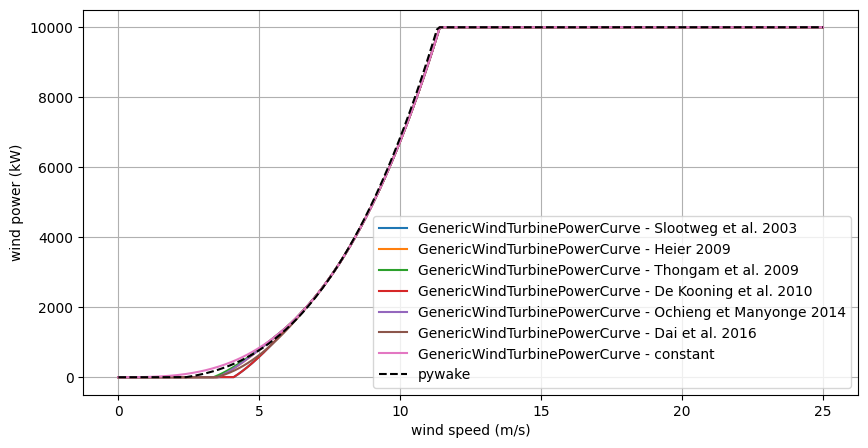

In [4]:
for Model in ['Slootweg et al. 2003','Heier 2009','Thongam et al. 2009','De Kooning et al. 2010','Ochieng et Manyonge 2014','Dai et al. 2016','constant']:
    Pwt_gen=GWTPC.GenericWindTurbinePowerCurve(ws,Pnom=10000,Drotor=178.3,Vcutin=0,CpMax=.49,zhub=119,TI=0.00,Model=Model)
    plt.plot(ws,Pwt_gen,label='GenericWindTurbinePowerCurve - {}'.format(Model))
plt.plot(ws, gen_wt.power(ws)*1e-3,'k--', label='pywake')
plt.ylabel('wind power (kW)')
plt.xlabel('wind speed (m/s)')
plt.legend()
plt.grid()

### Comparison of the two models for different rotor area

Text(0.5, 0, 'wind speed (m/s)')

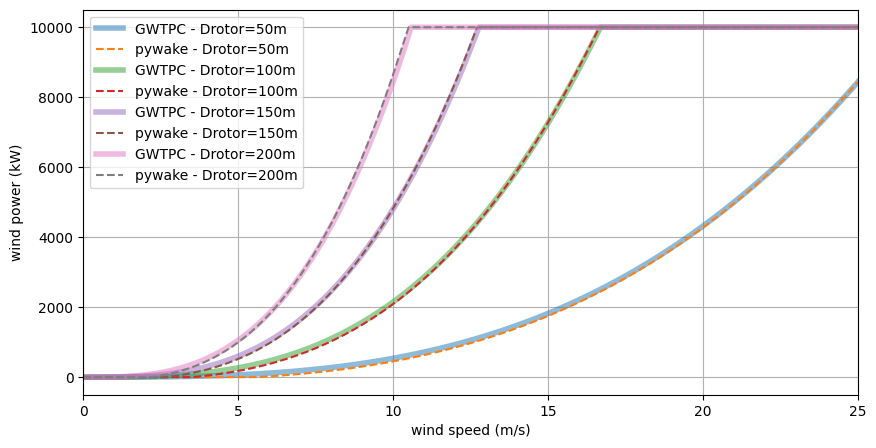

In [5]:
vDrotor=[50,100,150,200]

fig,axs=plt.subplots(1,1,figsize=[10,5])
for ii,Drotor in enumerate(vDrotor):
    
    Pwt_GWTPC=GWTPC.GenericWindTurbinePowerCurve(ws,Pnom=10000,Drotor=Drotor,Vcutin=0,CpMax=.49,zhub=119,TI=0.00,Model='constant')
    plt.plot(ws,Pwt_GWTPC,label='GWTPC - Drotor={}m'.format(Drotor),lw=4,alpha=0.5)
    
    gen_wt = GenericWindTurbine('pywake test turbine', Drotor, 119, power_norm=10000, turbulence_intensity=.0)
    plt.plot(ws, gen_wt.power(ws)*1e-3,'--', label='pywake - Drotor={}m'.format(Drotor))
plt.ylabel('wind power (kW)')
plt.legend()
plt.grid()
plt.xlim([0,25])
plt.xlabel('wind speed (m/s)')

### Comparison of the two models for different values of the turbulence intensity

Text(0.5, 0, 'wind speed (m/s)')

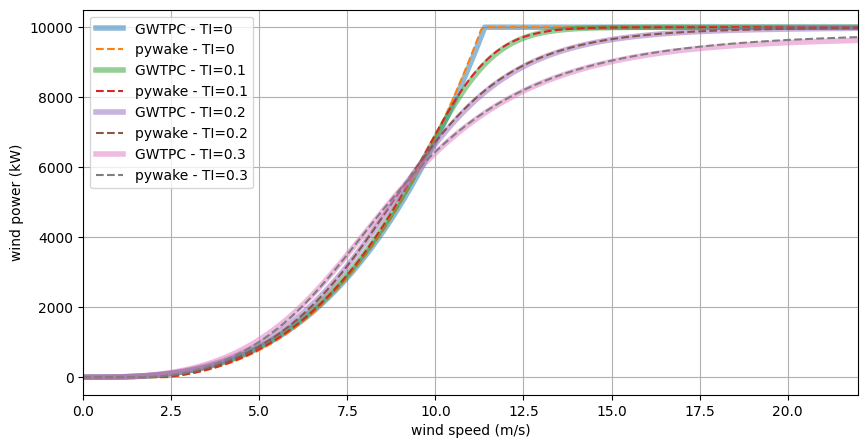

In [10]:
vTI=[0,0.1,0.2,0.3]

fig,axs=plt.subplots(1,1,figsize=[10,5])
for ii,TI in enumerate(vTI):
    
    Pwt_GWTPC=GWTPC.GenericWindTurbinePowerCurve(ws,Pnom=10000,Drotor=178.3,Vcutin=0,CpMax=.49,zhub=119,TI=TI,Model='constant')
    axs.plot(ws,Pwt_GWTPC,label='GWTPC - TI={}'.format(TI),lw=4,alpha=0.5)
    
    gen_wt = GenericWindTurbine('pywake test turbine', 178.3, 119, power_norm=10000, turbulence_intensity=TI)
    axs.plot(ws, gen_wt.power(ws)*1e-3,'--', label='pywake - TI={}'.format(TI))
    
plt.ylabel('wind power (kW)')
plt.legend()
plt.grid()
plt.xlim([0,22])
plt.xlabel('wind speed (m/s)')